In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import scipy.io
 
train_mat = scipy.io.loadmat('data/mnist_train.mat')
train_data = train_mat['images']
train_labels = train_mat['labels']
 
test_mat = scipy.io.loadmat('data/mnist_test.mat')
test_data = test_mat['t10k_images']
test_labels = test_mat['t10k_labels']

In [3]:
K = train_data.shape[0]
N = train_data.shape[1]
print train_data.shape
# each column in the matrix is the set of values for an instance

(784, 60000)


In [29]:
zeros = [i for i in range(len(train_labels)) if train_labels[i][0] == 0]

5923
1
[ 0.  0.  0. ...,  0.  0.  0.]
<type 'numpy.ndarray'>
(5923, 784)
(1, 784)


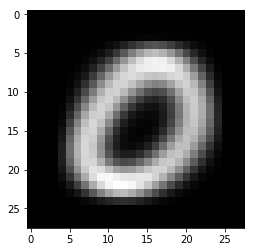

In [30]:
print len(zeros)
print zeros[0]
print train_data[zeros[0]]
zero_mat = np.array([train_data[:,i] for i in zeros])
print type(zero_mat)
print zero_mat.shape
zero_avg = np.mean(zero_mat, axis=0, keepdims=True)
print zero_avg.shape
plt.imshow( zero_avg.reshape(28,28).T, interpolation='nearest', cmap="gray")

In [4]:
avgs = []
for i in range(10):
    vals = [j for j in range(len(train_labels)) if train_labels[j][0] == i]
    vals_mat = np.array([train_data[:,j] for j in vals])
    vals_avg = np.mean(vals_mat, axis=0)
    avgs += [vals_avg]
    
avgs = np.array(avgs)
print avgs.shape

(10, 784)


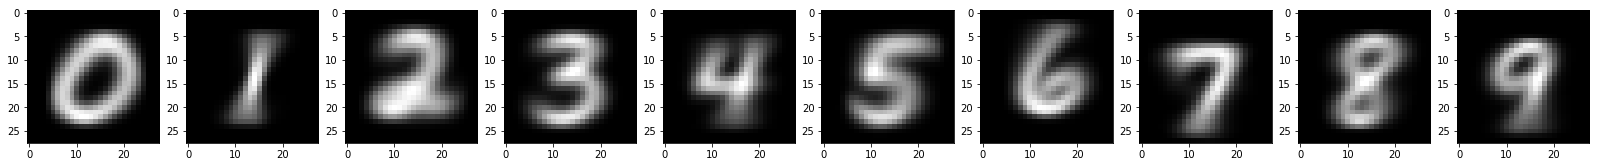

In [5]:
fig, ax_lst = plt.subplots(1, 10, figsize=(28, 28))

for i, avg in enumerate(avgs):
    ax_lst[i].imshow( avg.reshape(28,28).T, interpolation='nearest', cmap="gray")
    
plt.show()

In [19]:
sigma = np.eye( K )

print test_data.shape

(784, 10000)


In [6]:
prob = []
for i in range(len(avgs)):
    diff = avgs[i:i+1].T - test_data
    prob += [np.exp( -0.5 * np.sum( diff * diff, axis=0 ) )]
    
prob = np.array(prob)
print prob.shape
predictions = np.argmax(prob, axis=0)
print predictions.shape

(10, 10000)
(10000,)


In [7]:
count = 0
for i, pred in enumerate(predictions):
    if pred != test_labels[i][0]:
        count += 1

error = float(count) / float(test_labels.shape[0])
print str(error * 100) + '% error rate'

17.97% error rate


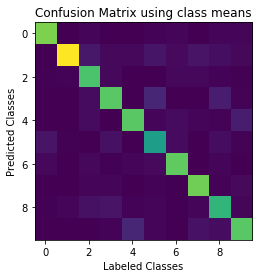

In [8]:
confusion = []
for k in range(10):
    vals = [test_labels[i,0] for i, p in enumerate(predictions) if p == k]
    confusion += [np.bincount(vals, minlength=10)]
    
confusion = np.array(confusion)
# print confusion.shape
# print confusion

plt.title('Confusion Matrix using class means')
plt.xlabel('Labeled Classes')
plt.ylabel('Predicted Classes')
plt.imshow( confusion )

In [9]:
classes = []
for i in range(10):
    classes += [np.array([train_data[:,j] for j in range(len(train_labels)) if train_labels[j][0] == i]).T]

In [105]:
probs = []
tests = test_data[:,:100]
for arr in classes:
    prob = []
    for k in range(tests.shape[1]):
        diff = tests[:,k:k+1] - arr
        prob += [np.mean( np.exp( -0.5 * np.sum( diff * diff, axis=0 ) ) )]
    
    probs += [np.array(prob)]
        
probs = np.array(probs)
print probs.shape

(10, 100)


In [ ]:
probs = []
tests = test_data[:,:1000]
for k in range(tests.shape[1]):
    prob = []
    for arr in classes:
        diff = tests[:,k:k+1] - arr
        prob += [np.mean( np.exp( -0.5 * np.sum( diff * diff, axis=0 ) ) )]
    probs += [np.array(prob)]
        
probs = np.array(probs)
print probs.shape

In [ ]:
preds = np.argmax(probs, axis=1)
print preds.shape

In [ ]:
print preds[:10]
print test_labels[:10,0]

In [ ]:
count = 0
for i, pred in enumerate(preds):
    if pred != test_labels[i][0]:
        count += 1

error = float(count) / float(len(preds))
print str(error * 100) + '% error rate'

In [ ]:
confusion = []
for k in range(10):
    vals = [test_labels[i,0] for i, p in enumerate(preds) if p == k]
    confusion += [np.bincount(vals, minlength=10)]
    
confusion = np.array(confusion)
# print confusion.shape
# print confusion

plt.title('Confusion Matrix Using Full Kernel Density Estimater')
plt.xlabel('Labeled Classes')
plt.ylabel('Predicted Classes')
plt.imshow( confusion )